# Data anlysis Baptiste
## I'll start with some descriptive analysis

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
movies = pd.read_csv('./data/movies.csv')
ratings = pd.read_csv('./data/ratings.csv')

In [60]:
unique_users = len(ratings["userId"].unique())
print(f"There are {unique_users} unique users")

unique_movies = len(ratings["movieId"].unique())
print(f"There are {unique_movies} unique movies")

unique_genres = set()

genres = movies["genres"]
for genre in genres:
    unique_genres.update(genre.split("|"))

print(f"There are {len(unique_genres)} genres")

There are 610 unique users
There are 9724 unique movies
There are 20 genres


## Next up: some basic plots to count and get an insight of the distribution of our data

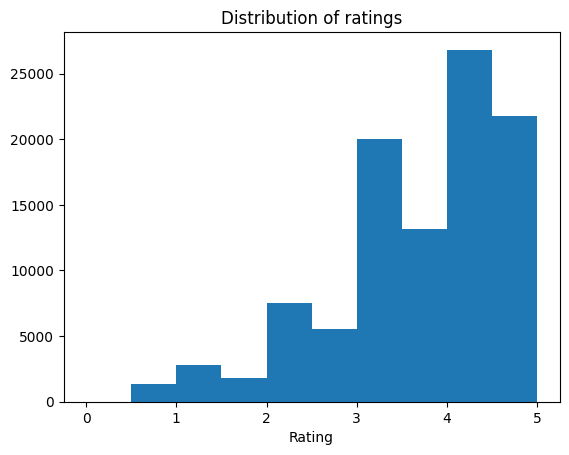

In [61]:
plt.hist(ratings["rating"], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.title("Distribution of ratings")
plt.xlabel("Rating")
plt.show()

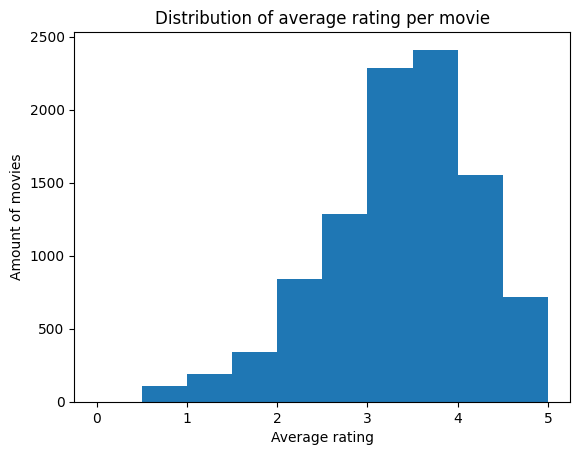

In [62]:
plt.hist(ratings.groupby("movieId")["rating"].mean(), bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.title("Distribution of average rating per movie")
plt.xlabel("Average rating")
plt.ylabel("Amount of movies")
plt.show()

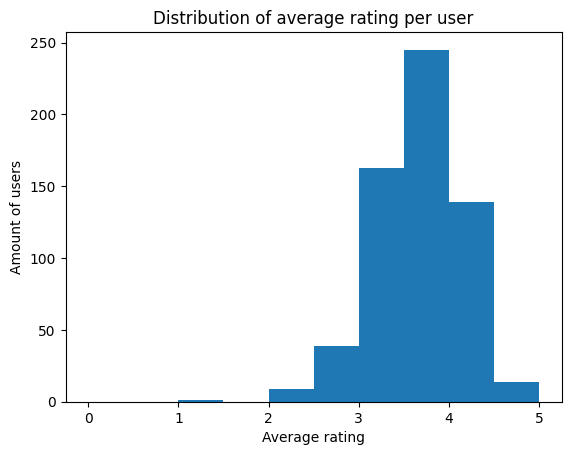

In [63]:
plt.hist(ratings.groupby("userId")["rating"].mean(), bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.title("Distribution of average rating per user")
plt.xlabel("Average rating")
plt.ylabel("Amount of users")
plt.show()

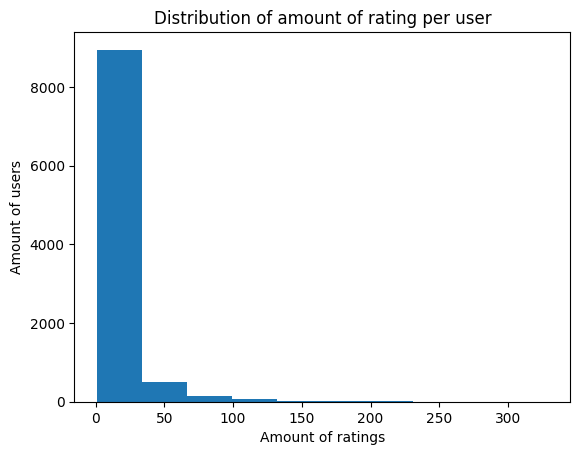

In [64]:
plt.hist(ratings.groupby("movieId")["rating"].count())
plt.title("Distribution of amount of rating per user")
plt.xlabel("Amount of ratings")
plt.ylabel("Amount of users")
plt.show()

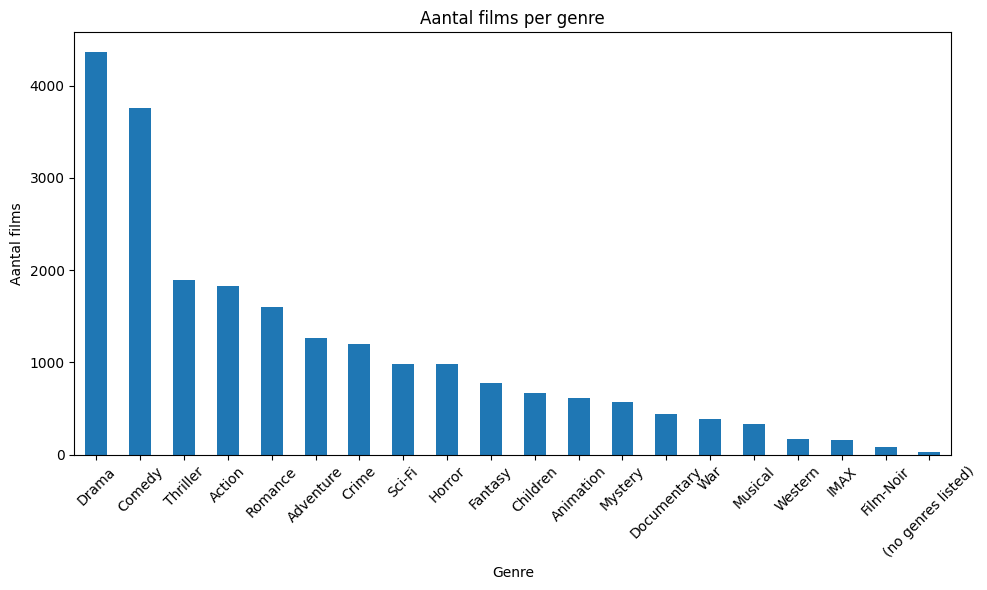

In [65]:
movies["genres"] = movies["genres"].str.split("|")
genre_counts = {genre: 0 for genre in unique_genres}

for genre in unique_genres:
    genre_counts[genre] = movies["genres"].apply(lambda g_list: genre in g_list).sum()

genre_series = pd.Series(genre_counts).sort_values(ascending=False)

plt.figure(figsize=(10,6))
genre_series.plot(kind="bar")
plt.title("Aantal films per genre")
plt.xlabel("Genre")
plt.ylabel("Aantal films")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()